In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('Data/ml-20m/ratings.csv')

# Counting the frequency of each rating
rating_counts = df['rating'].value_counts().sort_index()

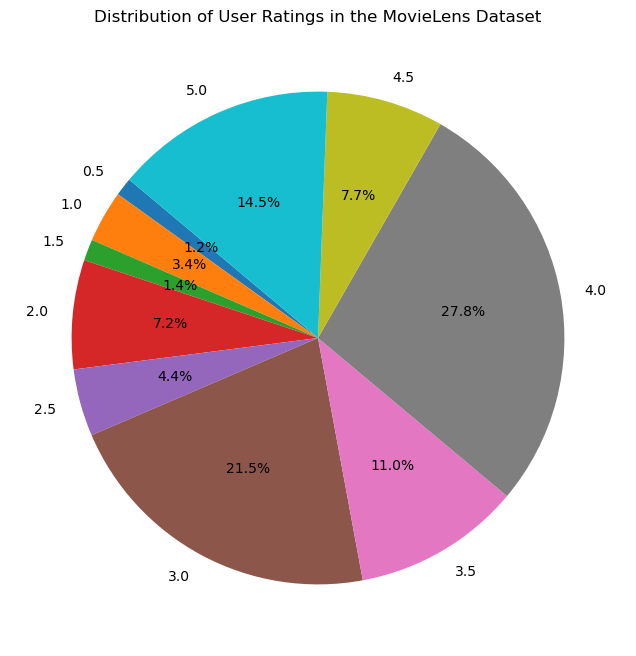

In [6]:
# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Ratings in the MovieLens Dataset')
plt.show()

In [14]:
# Counting movies rated by each user
user_movie_count = df.groupby('userId')['movieId'].count()

In [17]:
# Calculate frequencies
frequency_counts = user_movie_count.value_counts().sort_index()

# Compute cumulative frequency
cumulative_frequency = frequency_counts.cumsum() / user_movie_count.count()

In [23]:
frequency_counts[:5]

movieId
20    4485
21    3104
22    2832
23    2641
24    2365
Name: count, dtype: int64

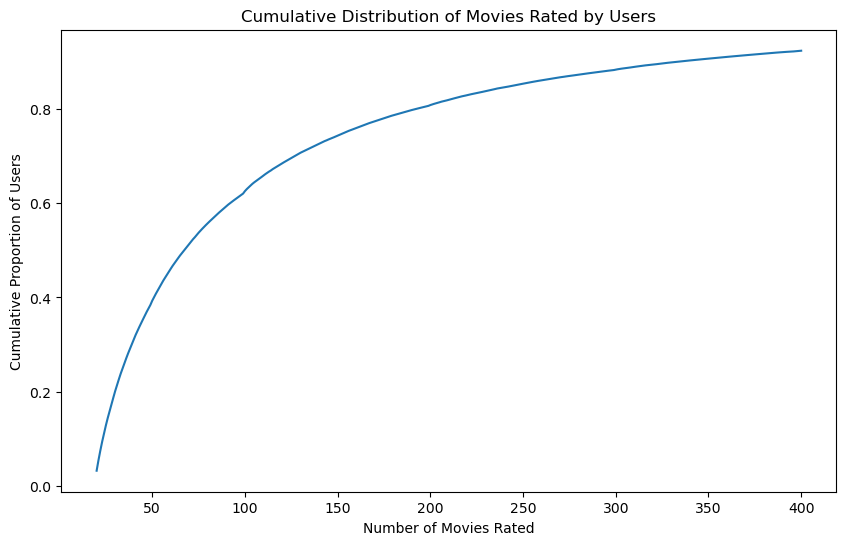

In [28]:
# Variable to control max value on x-axis
max_x_value = 400  # Example value, adjust as needed

# Main plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_frequency[cumulative_frequency.index <= max_x_value])
plt.title('Cumulative Distribution of Movies Rated by Users')
plt.xlabel('Number of Movies Rated')
plt.ylabel('Cumulative Proportion of Users')

# Inset plot details
# inset_ax = plt.axes([0.5, 0.5, 0.35, 0.35]) # Inset position and size
# inset_max_x_value = 100  # Example value, adjust as needed
# inset_ax.plot(cumulative_frequency[cumulative_frequency.index <= inset_max_x_value])
# inset_ax.set_title('Detailed View')
# inset_ax.set_xlabel('Number of Movies Rated')
# inset_ax.set_ylabel('Cumulative Proportion')

plt.show()

In [29]:
# Counting users rating each movie
movie_user_count = df.groupby('movieId')['userId'].count()

In [30]:
# Calculate frequencies for each movie rating count
frequency_counts = movie_user_count.value_counts().sort_index()

# Compute cumulative frequency
cumulative_frequency = frequency_counts.cumsum() / movie_user_count.count()

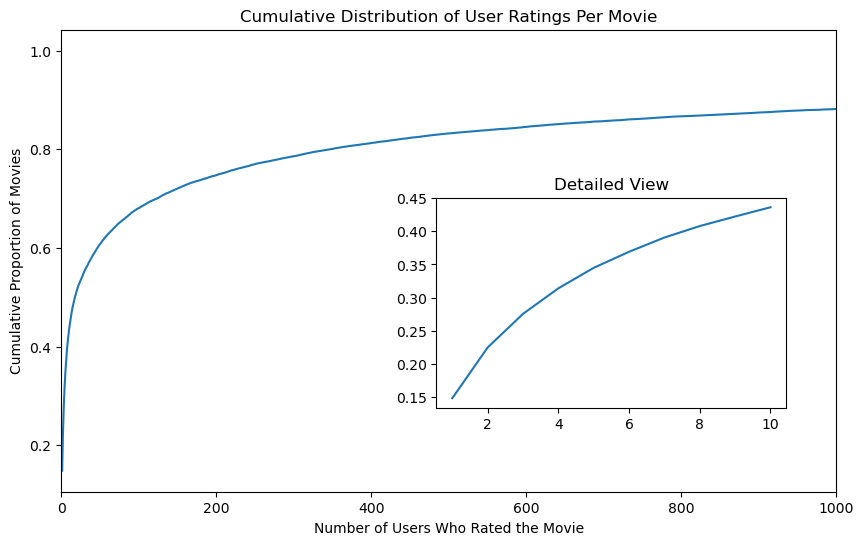

In [38]:
# Variable to control max value on x-axis for the movie ratings
max_x_value = 1000  # You could set this to a specific value if needed

# Create the cumulative distribution line plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_frequency.index, cumulative_frequency.values)
plt.title('Cumulative Distribution of User Ratings Per Movie')
plt.xlabel('Number of Users Who Rated the Movie')
plt.ylabel('Cumulative Proportion of Movies')
plt.xlim(0, max_x_value)  # Set the limit for the x-axis if needed

# Inset plot details
inset_ax = plt.axes([0.5, 0.25, 0.35, 0.35]) # Inset position and size
inset_max_x_value = 10  # Example value, adjust as needed
inset_ax.plot(cumulative_frequency[cumulative_frequency.index <= inset_max_x_value])
inset_ax.set_title('Detailed View')
# inset_ax.set_xlabel('Number of Movies Rated')
# inset_ax.set_ylabel('Cumulative Proportion')

plt.show()